In [3]:
import numpy as np
import pyross
from matplotlib import pyplot as plt 

In [32]:
# Get individual contact matrices
CH, CW, CS, CO = pyross.contactMatrix.UK()

# Generate class with contact matrix for SIR model with UK contact structure
generator = pyross.contactMatrix.ContactMatrixFunction(CH, CW, CS, CO)

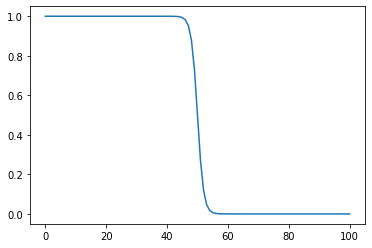

In [36]:
# Define a tanh protocol for aW, aS, aO 
def intervention_func(t, width=1, loc=0):
    a = (1-np.tanh((t-loc)/width))/2 
    return a, a, a 

width = 2 
loc = 50 
t = np.linspace(0, 100, 101)
aW = intervention_func(t, width=width, loc=loc)[0]
plt.plot(t, aW)
plt.show()

In [37]:
contactMatrix = generator.intervention_custom_temporal(intervention_func, width=width, loc=loc)

In [38]:
# compare: initially, all contacts 
(CH + CW + CS + CO == contactMatrix(0)).all()

True

In [40]:
# compare: in the end, only home contacts 
(CH == contactMatrix(100)).all()

True